In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("huge_seqsim.txt", sep=' ')

In [4]:
len(data)

12101386

In [7]:
data = data.sample(n=100000)

In [5]:
data['Variant Length'] = data['copy_gain'] * data['motif_len']
data['Simulated Similarity'] = 1 - (data['num_changes'] / (data['Variant Length'] * 2))

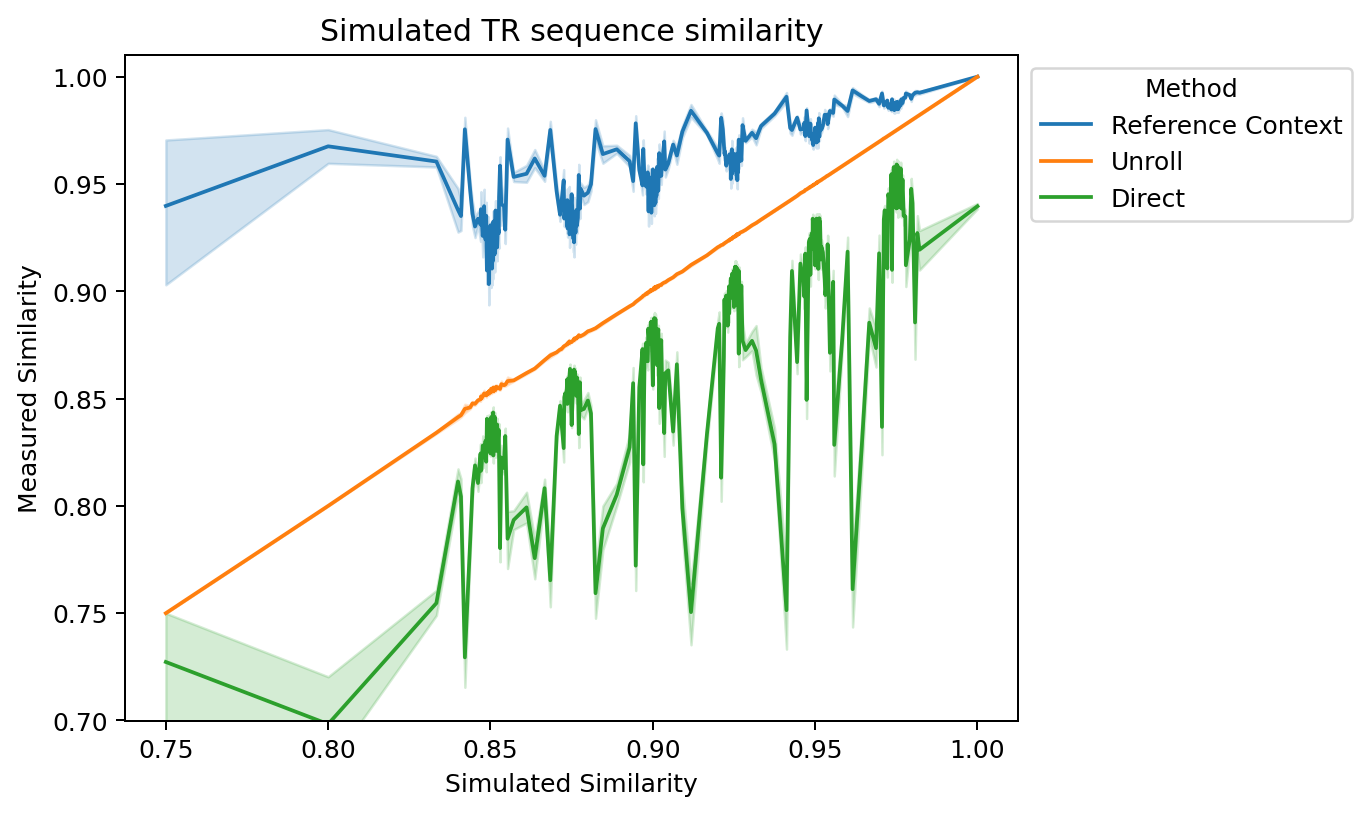

In [21]:
plt.figure(dpi=180)
view = data.melt(id_vars="Simulated Similarity", 
                 value_vars=["ref_context_sim", "unroll_sim", "nonroll_sim"], 
                 value_name="Measured Similarity")
view['Method'] = view['variable'].map({"ref_context_sim": "Reference Context",
                                       "unroll_sim": "Unroll",
                                      "nonroll_sim": "Direct"})
p = sb.lineplot(data=view, x='Simulated Similarity', y="Measured Similarity", hue='Method')
p.set(ylim=(0.70, 1.01), title="Simulated TR sequence similarity")
#sb.move_legend(
#    p, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
#)
sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("SeqSimulated.pdf")

In [ ]:
view['Similarity Difference'] = view['Measured Similarity'] - view['Simulated Similarity']

<Axes: xlabel='Method', ylabel='Similarity Difference'>

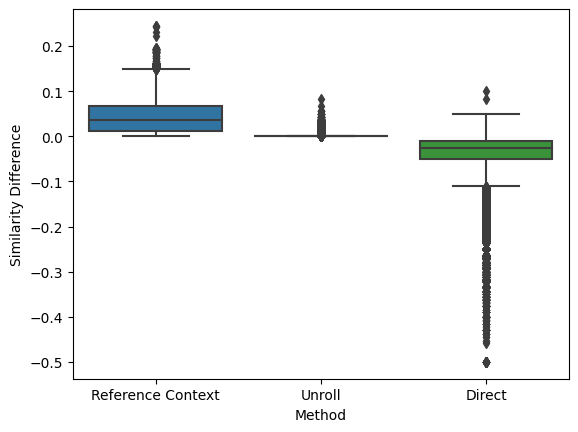

In [10]:
sb.boxplot(data=view, y="Similarity Difference", x="Method")

In [11]:
view.groupby(['Method'])['Similarity Difference'].describe()

,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
Direct,100000.0,-0.043416,0.055895,-5.000000e-01,-0.051020,-0.026515,-0.010526,0.100000
Reference Context,100000.0,0.042961,0.036472,0.000000e+00,0.012821,0.035077,0.067558,0.244565
Unroll,100000.0,0.000733,0.002783,-1.110223e-16,0.000000,0.000000,0.000000,0.083333


In [12]:
from scipy.stats import pearsonr
x = view[view['Method'] == 'Reference Context']
print(pearsonr(x['Simulated Similarity'], x['Measured Similarity']))

x = view[view['Method'] == 'Unroll']
print(pearsonr(x['Simulated Similarity'], x['Measured Similarity']))

x = view[view['Method'] == 'Direct']
print(pearsonr(x['Simulated Similarity'], x['Measured Similarity']))

PearsonRResult(statistic=0.6795490620726864, pvalue=0.0)
PearsonRResult(statistic=0.9985161271673182, pvalue=0.0)
PearsonRResult(statistic=0.6101421353346825, pvalue=0.0)


In [10]:
data[data['unroll_sim'] - data['Simulated Similarity'].abs() > 0.01]['div'].value_counts() / data['div'].value_counts()

0              NaN
5     5.867873e-07
10    7.108459e-04
15    3.879170e-03
20    1.357594e-02
25    3.486394e-02
30    8.104214e-02
Name: div, dtype: float64

All simulations where the unroll similarity is greater than 1% different from the simulated similarity had between 10-30% simulated divergence

<Axes: xlabel='alt_pos', ylabel='Count'>

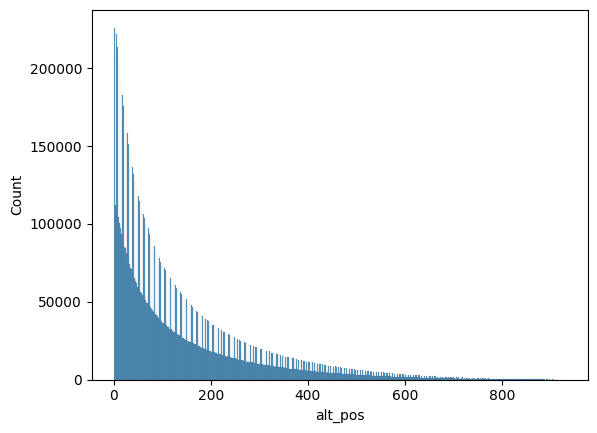

In [11]:
sb.histplot(data=data, x="alt_pos")

[(0.7, 1.01)]

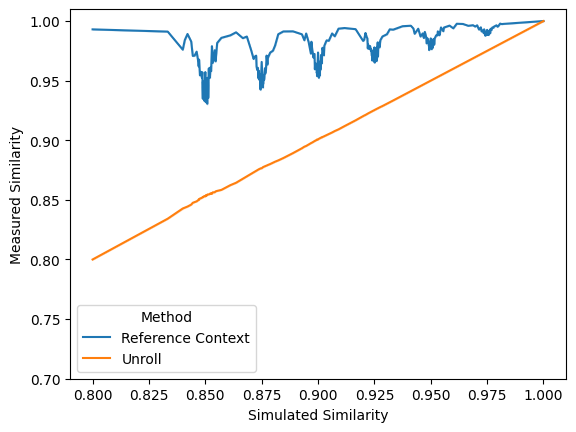

In [12]:
view2 = data[data['alt_pos'] >= 100].melt(id_vars="Simulated Similarity", 
                 value_vars=["ref_context_sim", "unroll_sim"], 
                 value_name="Measured Similarity")
view2['Method'] = view2['variable'].map({"ref_context_sim": "Reference Context",
                                       "unroll_sim": "Unroll"})
p = sb.lineplot(data=view2, x='Simulated Similarity', y="Measured Similarity", hue='Method')
p.set(ylim=(0.70, 1.01))

<Axes: xlabel='Variant Length', ylabel='Count'>

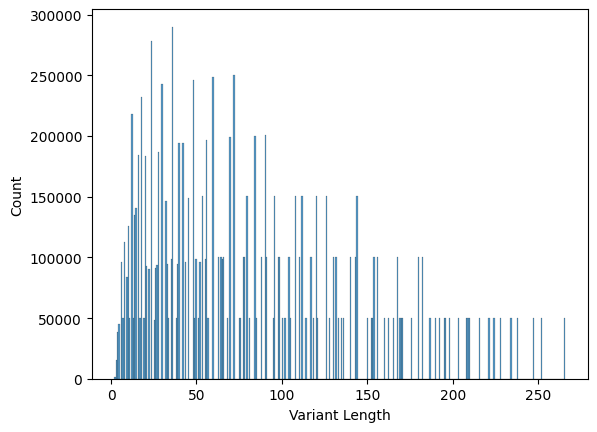

In [13]:
sb.histplot(data=data, x="Variant Length")

In [14]:
data['alt_pos'].min(), data['alt_pos'].max()

(1, 931)

In [15]:
data['Variant Length'].min(), data['Variant Length'].max()

(2, 266)